In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [23]:
#Importing Datasets and add headers

house_price_data = pd.read_csv('housing.csv',delim_whitespace=True, 
names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
house_price_data

/var/folders/3g/bpt8zgrj6m76hzm0x1_4nbnw0000gn/T/ipykernel_14694/2333051013.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  house_price_data = pd.read_csv('housing.csv',delim_whitespace=True,


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [30]:
house_price_data = house_price_data.rename(columns={'MEDV': 'PRICE'})

In [31]:
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
#Checking the number of rows and columns
house_price_data.shape

(506, 14)

In [34]:
#Checking missing values

check_flag = False

for i in house_price_data.columns:
    if house_price_data[i].isnull().sum()>0:
        check_flag= True
        # print(house_price_data[i])
if check_flag:
    print("Null values are present in the dataset")
else:
    print("Null values are not present")

#or

print(house_price_data.isnull().sum())

Null values are not present
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [35]:
# Statistical mesures of the dataset

house_price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
#Understanding the correlation between various features in the dataset
# 1. Positive correlation
# 2. Negative correlation


correlation_data = house_price_data.corr()


<Axes: >

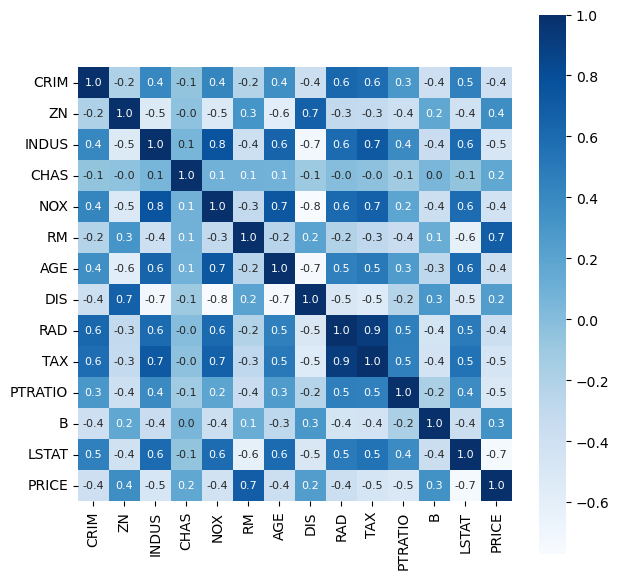

In [43]:
# Heatmap for understanding correlation

plt.figure(figsize=(7,7))
sns.heatmap(correlation_data, cbar= True, square= True, fmt='.1f', annot= True, annot_kws={'size':8}, cmap= 'Blues')

In [44]:
# Splitting the data and label
X = house_price_data.drop('PRICE', axis=1)
Y = house_price_data['PRICE']

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [46]:
#Splitting the data into training data and test data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [47]:
#Training the model (XGBOOST)

#Loading the model
model = XGBRegressor()

#Training the model

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
#Prediction on training data

training_data_prediction = model.predict(x_train)
training_data_prediction

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

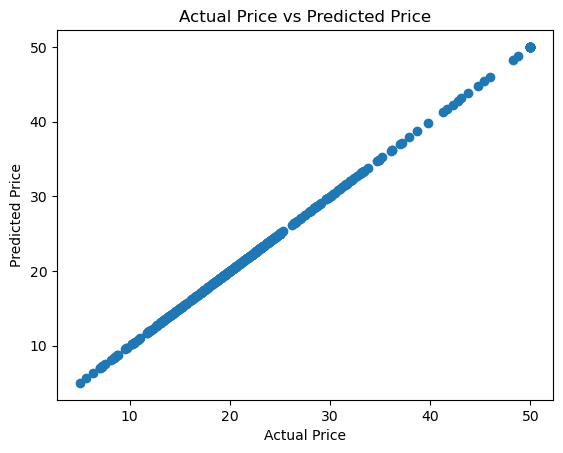

In [61]:
#Visualaizing actual price and predicted price in Trained data

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [55]:
#R square error
score_1 = metrics.r2_score(y_train, training_data_prediction)


#Mean absolute error

score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R square error : ", score_1)
print("Mean absolute error : ", score_2)


R square error :  0.9999980039471451
Mean absolute error :  0.0091330346494618


In [64]:
#Prediction on test data

test_data_prediction = model.predict(x_test)
test_data_prediction

array([22.007828 , 21.22598  , 30.466019 , 27.735027 ,  9.134951 ,
       12.740403 , 25.738058 , 27.750889 , 25.364376 , 20.229292 ,
       27.821787 , 24.7761   , 19.771252 , 20.497349 , 12.970438 ,
       22.86288  , 19.605635 , 10.677987 ,  8.277654 , 15.529657 ,
       22.842052 , 20.002996 , 34.06762  , 18.943192 , 15.624948 ,
       18.787666 , 46.0246   , 33.05114  , 34.804283 , 19.070232 ,
       17.53711  , 20.27066  , 31.102339 , 24.026129 , 12.199101 ,
       18.224184 , 10.182956 , 21.252314 , 22.891352 , 21.458113 ,
       26.451164 , 12.1898775, 27.141438 ,  8.322471 , 21.356699 ,
       12.768549 , 35.221687 , 14.574406 , 32.06173  , 15.088605 ,
       31.076805 , 26.808199 ,  6.1558666, 34.42615  , 25.135347 ,
       19.508772 , 19.424906 , 19.58183  , 16.680052 , 22.962534 ,
       20.904106 , 21.24     , 18.46788  , 29.243906 , 33.434864 ,
       26.021257 , 49.91979  , 25.905489 ,  9.713634 , 24.058743 ,
       16.63922  ,  9.0341625, 13.197622 , 18.80479  , 26.9856

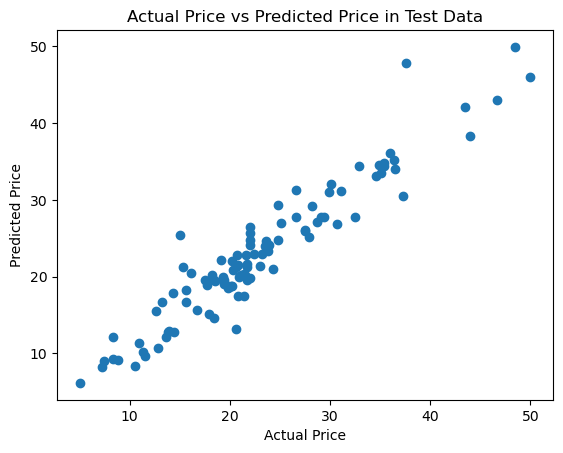

In [65]:
#Visualaizing actual price and predicted price in test data

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price in Test Data")
plt.show()

In [69]:
#R square error
test_score_1 = metrics.r2_score(y_test, test_data_prediction)


#Mean absolute error

test_score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("Test Data R square error : ", score_1)
print("Test Data Mean absolute error : ", score_2)


Test Data R square error :  0.9999980039471451
Test Data Mean absolute error :  0.0091330346494618
